## Quest3
    - 분석 제공 대상이 의사
    - 목표 변수 : '수술시간'
    - 설명 변수 지정 최소 5개 이상(범주형, 연속형 섞여 있어야함.)
    - DDA/README.md 변수 설명/데이터 type/이유
    - 추출 : 수술시간이 중앙값 이상인 것.
    - 요약 : 수술시간에 가장 영향을 주는 항목 3가지 확인.
    - 파일명 : RecurrenceOfSurgery_Doctors_DDA.ipynb

### 의사 대상 분석 필요
0. 변수 구조 확인
1. 목표 변수 설정 : '수술시간' 정의
2. 설명 변수 설정 : '고혈압여부','당뇨여부','신부전여부','심혈관질환','연령','수술기법' 정의 

In [29]:
import pandas as pd

In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic')
import seaborn as sns

In [31]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [32]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [33]:
df_ROS_Doctor = df_ROS[['수술시간','고혈압여부','당뇨여부','신부전여부','심혈관질환','연령','수술기법']]
df_ROS_Doctor.iloc[:10]

,수술시간,고혈압여부,당뇨여부,신부전여부,심혈관질환,연령,수술기법
0,68.0,0,0,0,0,66,TELD
1,31.0,0,0,0,0,47,TELD
2,78.0,0,0,0,0,39,TELD
3,73.0,1,0,0,0,40,TELD
4,29.0,1,0,0,0,42,TELD
5,47.0,0,0,0,0,60,TELD
6,7.0,0,1,0,0,47,TELD
7,85.0,0,0,0,0,55,TELD
8,49.0,0,0,0,0,52,TELD
9,59.0,0,0,0,0,79,TELD


In [34]:
df_ROS_Doctor.describe()

,수술시간,고혈압여부,당뇨여부,신부전여부,심혈관질환,연령
count,1840.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,62.066304,0.130940,0.062830,0.025343,0.035903,41.463569
std,24.994615,0.337424,0.242721,0.157207,0.186097,13.444629
min,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,45.000000,0.000000,0.000000,0.000000,0.000000,32.000000
50%,60.000000,0.000000,0.000000,0.000000,0.000000,41.000000
75%,77.000000,0.000000,0.000000,0.000000,0.000000,49.000000
max,220.000000,1.000000,1.000000,1.000000,1.000000,86.000000


In [35]:
df_ROS_Doctor_time = df_ROS_Doctor.sort_values('수술시간')

In [36]:
df_ROS_Doctor_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 672 to 1763
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수술시간    1840 non-null   float64
 1   고혈압여부   1894 non-null   int64  
 2   당뇨여부    1894 non-null   int64  
 3   신부전여부   1894 non-null   int64  
 4   심혈관질환   1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   수술기법    1813 non-null   object 
dtypes: float64(1), int64(5), object(1)
memory usage: 118.4+ KB


In [37]:
df_ROS_Doctor_time.describe()

,수술시간,고혈압여부,당뇨여부,신부전여부,심혈관질환,연령
count,1840.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,62.066304,0.130940,0.062830,0.025343,0.035903,41.463569
std,24.994615,0.337424,0.242721,0.157207,0.186097,13.444629
min,5.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,45.000000,0.000000,0.000000,0.000000,0.000000,32.000000
50%,60.000000,0.000000,0.000000,0.000000,0.000000,41.000000
75%,77.000000,0.000000,0.000000,0.000000,0.000000,49.000000
max,220.000000,1.000000,1.000000,1.000000,1.000000,86.000000


In [38]:
condition = df_ROS_Doctor_time['수술시간']<63

In [39]:
df_ROS_Doctor_time = df_ROS_Doctor_time.loc[condition]

In [40]:
df_ROS_Doctor_time

,수술시간,고혈압여부,당뇨여부,신부전여부,심혈관질환,연령,수술기법
672,5.0,0,0,0,0,39,TELD
101,6.0,0,0,1,0,41,TELD
821,6.0,0,0,0,0,37,TELD
536,6.0,0,0,0,0,29,TELD
6,7.0,0,1,0,0,47,TELD
...,...,...,...,...,...,...,...
343,62.0,0,0,0,0,33,TELD
863,62.0,0,0,0,0,19,TELD
704,62.0,1,0,0,0,47,TELD
848,62.0,1,0,1,0,46,TELD


In [41]:
df_ROS_Doctor_time.pivot_table(index='고혈압여부',values='수술시간')

,수술시간
고혈압여부,
0,44.081839
1,45.694030


In [42]:
df_ROS_Doctor_time.pivot_table(index='당뇨여부',values='수술시간')

,수술시간
당뇨여부,
0,44.206897
1,45.478261


In [43]:
df_ROS_Doctor_time.pivot_table(index='신부전여부',values='수술시간')

,수술시간
신부전여부,
0,44.306387
1,43.708333


In [44]:
df_ROS_Doctor_time.pivot_table(index='심혈관질환',values='수술시간')

,수술시간
심혈관질환,
0,44.273453
1,45.083333


In [45]:
df_ROS_Doctor_time.pivot_table(index='수술기법',values='수술시간')

,수술시간
수술기법,
IELD,47.305085
TELD,44.188453


In [46]:
df_ROS_Doctor_time.pivot_table(index='연령',values='수술시간')

,수술시간
연령,
16,48.333333
17,42.111111
18,42.200000
19,48.000000
20,47.250000
...,...
75,38.500000
76,48.666667
77,60.000000


In [47]:
df_ROS_Doctor_total = df_ROS_Doctor_time.pivot_table(index=['수술기법','고혈압여부','당뇨여부'],values='수술시간',aggfunc=[np.mean, np.sum, np.median, np.min, np.max, np.var,np.std])

In [48]:
df_ROS_Doctor_total

mean      sum median  amin  amax         var        std
                      수술시간     수술시간   수술시간  수술시간  수술시간        수술시간       수술시간
수술기법 고혈압여부 당뇨여부                                                              
IELD 0     0     47.886792   2538.0   50.0  19.0  61.0  133.833091  11.568625
           1     61.000000     61.0   61.0  61.0  61.0         NaN        NaN
     1     0     38.400000    192.0   39.0  20.0  61.0  233.300000  15.274161
TELD 0     0     43.888305  33399.0   45.0   5.0  62.0  144.091455  12.003810
           1     44.088235   1499.0   45.0   7.0  62.0  156.567736  12.512703
     1     0     45.968750   4413.0   48.0  20.0  62.0  132.767434  11.522475
           1     46.444444   1254.0   45.0  20.0  60.0  104.487179  10.221897

In [49]:
df_ROS_drop = df_ROS_Doctor_time.dropna()

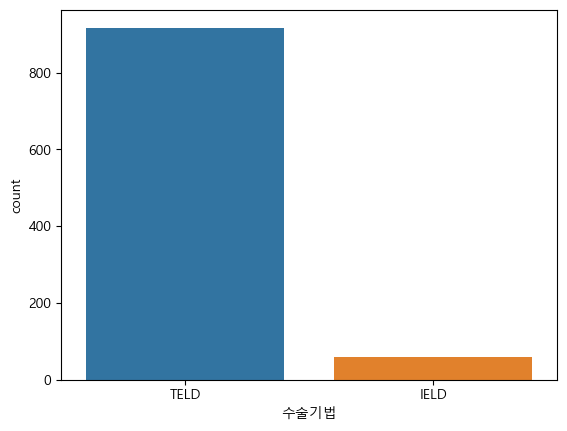

In [50]:
sns.countplot(data=df_ROS_drop, x='수술기법')
plt.show()

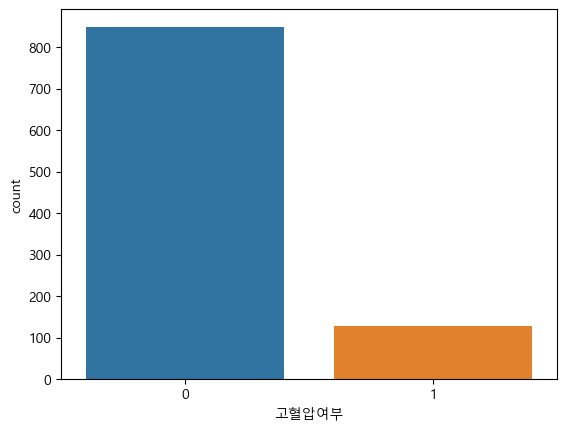

In [51]:
sns.countplot(data=df_ROS_drop, x='고혈압여부')
plt.show()

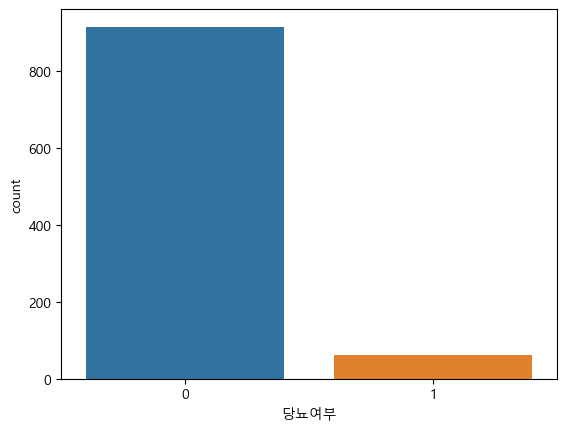

In [52]:
sns.countplot(data=df_ROS_drop, x='당뇨여부')
plt.show()

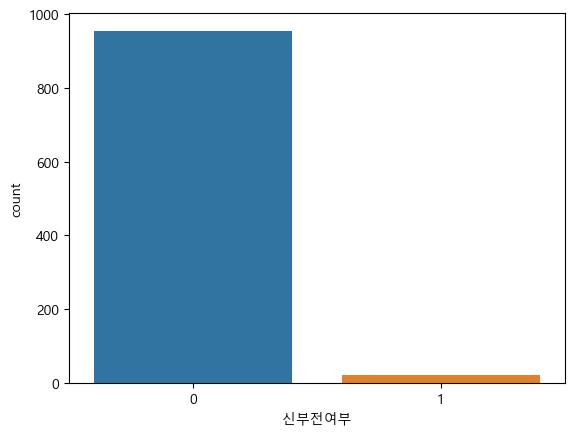

In [53]:
sns.countplot(data=df_ROS_drop, x='신부전여부')
plt.show()

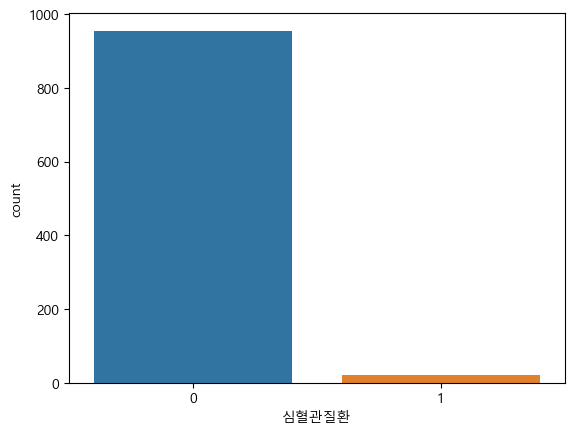

In [54]:
sns.countplot(data=df_ROS_drop, x='심혈관질환')
plt.show()

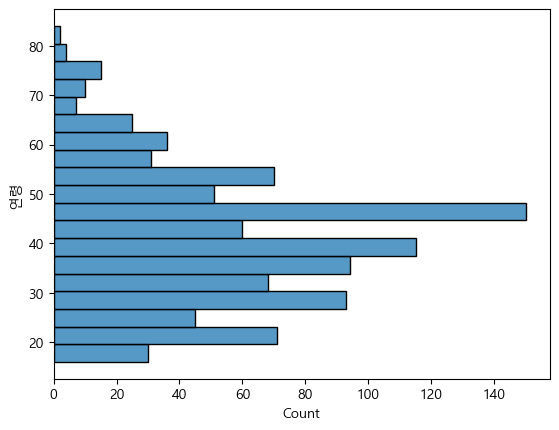

In [59]:
sns.histplot(data=df_ROS_drop, y='연령')
plt.show()

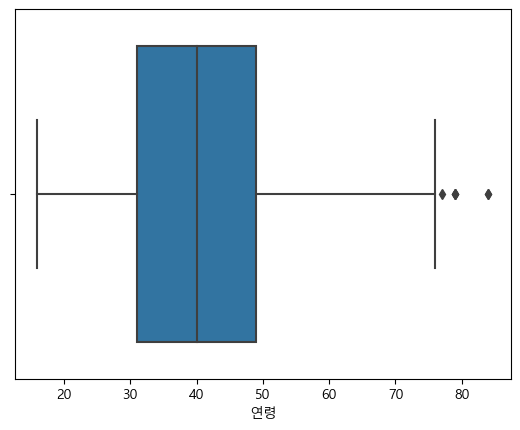

In [60]:
sns.boxplot(data=df_ROS_drop, x='연령')
plt.show()

In [61]:
Q1 = df_ROS_drop['연령'].describe()['25%']
Q3 = df_ROS_drop['연령'].describe()['75%']
IQR = Q3 - Q1

In [62]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low,bound_up

(4.0, 76.0)

In [63]:
condition = (df_ROS_drop['연령'] <= bound_up) #긍정 조건 변환
condition

672    True
101    True
821    True
536    True
6      True
       ... 
343    True
863    True
704    True
848    True
791    True
Name: 연령, Length: 977, dtype: bool

In [64]:
df_ROS_condition = df_ROS_drop[condition]

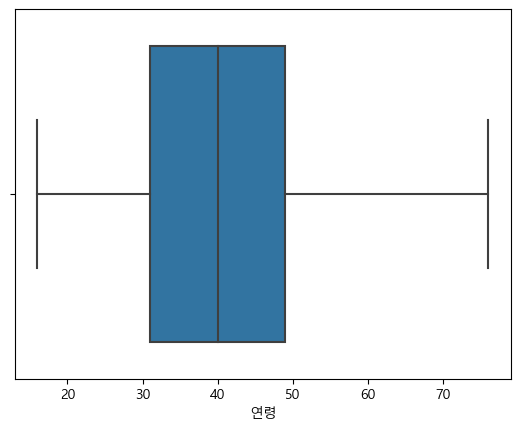

In [65]:
sns.boxplot(data=df_ROS_condition, x='연령')
plt.show()